In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE


In [11]:
# Loading the dataset
data = pd.read_csv('/content/creditcard_2023.csv')

# Display the first few rows of the dataset
print(data.head())

# Basic information about the dataset
print(data.info())

# Summary statistics of numerical features
print(data.describe())

# Checking the class distribution
print(data['Class'].value_counts())


   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26       V27       V28    Amount  C

In [12]:
# Checking columns with missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

# Since there are only a few missing values, we can fill them with the mean or median.
# Filling missing values with the median of each column
data.fillna(data.median(), inplace=True)

# Verifying if there are any missing values left
missing_values_after = data.isnull().sum()
print(missing_values_after[missing_values_after > 0])


Series([], dtype: int64)
Series([], dtype: int64)


In [13]:
from sklearn.preprocessing import StandardScaler

# Separating features (X) and target (y)
X = data.drop(['Class', 'id'], axis=1)  # Dropping 'Class' and 'id' as they are not features
y = data['Class']

# Scaling features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Checking the first few rows of the scaled data
print(pd.DataFrame(X_scaled, columns=X.columns).head())


         V1        V2        V3        V4        V5        V6        V7  \
0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0 -0.130006  0.727159  0.637735  ...  0.091202 -0.110552  0.217606 -0.134794   
1 -0.133118  0.347452  0.529808  ... -0.233984 -0.194936 -0.605761  0.079469   
2 -0.095576 -0.261297  0.690708  ...  0.361652 -0.005020  0.702906  0.945045   
3 -0.065130 -0.205698  0.575231  ... -0.378223 -0.146927 -0.038212 -0.214048   
4 -0.212660  1.049921  0.968046  ...  0.247237 -0.106984  0.729727 -0.161666   

        V24       V25       V26       V27       V28    Amount  
0  0

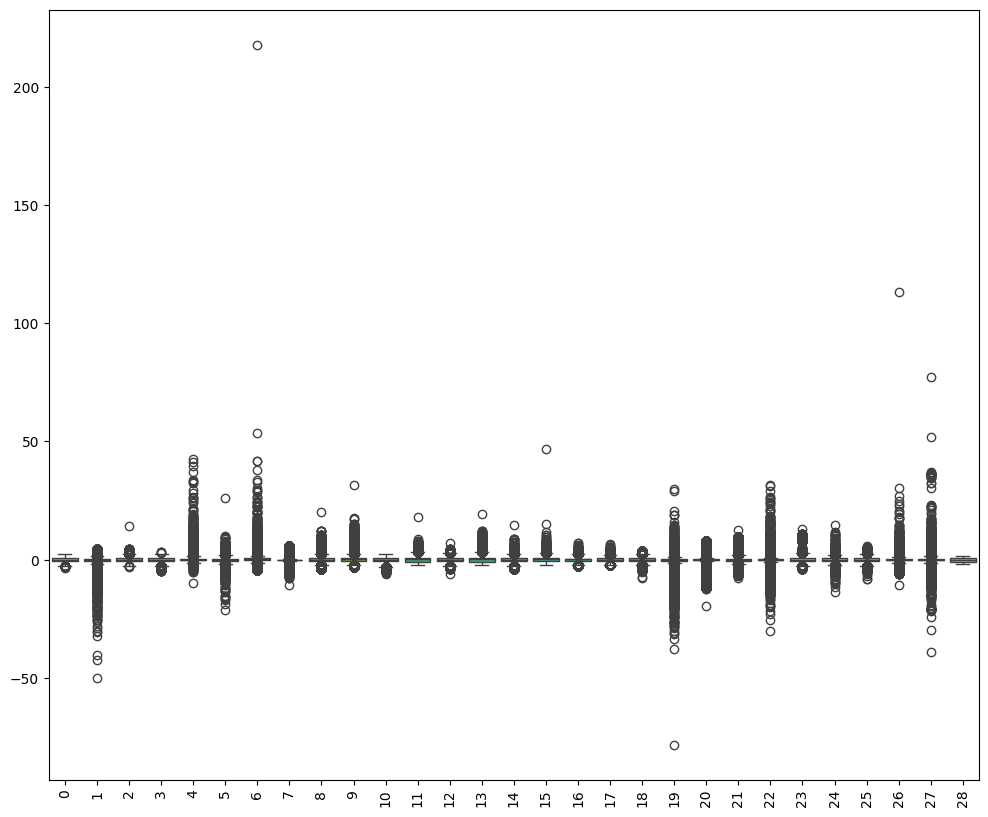

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting boxplots for the features
plt.figure(figsize=(12, 10))
sns.boxplot(data=X_scaled)
plt.xticks(rotation=90)
plt.show()


In [15]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Verifying the shape of the train and test sets
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (454904, 29)
Testing set size: (113726, 29)


In [16]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Verifying the distribution after SMOTE
print("Class distribution after SMOTE:", y_train_balanced.value_counts())


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Class distribution after SMOTE: Class
1    227565
0    227565
Name: count, dtype: int64


LOGISTIC REGRESSION


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Logistic Regression model
logreg = LogisticRegression(random_state=42)

# Train the model
logreg.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     56750
           1       0.98      0.95      0.96     56976

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726

Confusion Matrix:
[[55485  1265]
 [ 2695 54281]]


RANDOM FOREST CLASSIFIER

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Confusion Matrix:
[[56736    14]
 [    0 56976]]


XGBoost Classifier

In [19]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))


XGBoost Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Confusion Matrix:
[[56720    30]
 [    0 56976]]


Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Example with Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=param_grid_rf,
                              cv=3,
                              scoring='accuracy')

# Fit the grid search to the data
grid_search_rf.fit(X_train_balanced, y_train_balanced)

# Best parameters from GridSearch
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)

# Evaluate with the best model
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
print("Best Random Forest Performance:")
print(classification_report(y_test, y_pred_best_rf))


Evaluating model performance

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

# ROC-AUC for evaluating classification performance
roc_auc_logreg = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])
roc_auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
roc_auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

print(f"Logistic Regression ROC-AUC: {roc_auc_logreg}")
print(f"Random Forest ROC-AUC: {roc_auc_rf}")
print(f"XGBoost ROC-AUC: {roc_auc_xgb}")

# Plotting ROC curve for the best model
fpr, tpr, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='XGBoost (AUC = {:.2f})'.format(roc_auc_xgb))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve for XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Model Interpretation

In [ ]:
# For Random Forest
importances_rf = rf.feature_importances_
indices_rf = importances_rf.argsort()[::-1]
plt.figure(figsize=(10, 6))
plt.barh(X.columns[indices_rf], importances_rf[indices_rf])
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# For XGBoost
importances_xgb = xgb_model.feature_importances_
indices_xgb = importances_xgb.argsort()[::-1]
plt.figure(figsize=(10, 6))
plt.barh(X.columns[indices_xgb], importances_xgb[indices_xgb])
plt.title('Feature Importance - XGBoost')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()
